In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
replies_df = pd.read_excel("IPS_réponses.xlsx")
replies_df.head(2)

,Horodateur,What year of study are you in currently ?,What is your section?,"Before this activity, how familiar are you with topics like electoral districts, redistricting or gerrymandering?",How confident are you in your understanding of electoral redistricting and gerrymandering before this activity?,Which of the following best describes gerrymandering?,"Suppose a country has two parties, A and B, and each gets 50% of the total votes. Which statement is most plausible?",Which of the following is not a strategy used in gerrymandering ?,"Imagine a region where Party X has 60% of the votes and Party Y has 40%. After drawing districts, Party Y wins 60% of the seats. Which explanation is most likely?",Which of the following descriptions best matches a map that you might suspect is gerrymandered?,What is the main goal of the partisan player in the game?,"In the simulation, how does the fair player's approach differ from the partisan player's approach?",A party’s opponents are spread across many districts so that they are always a minority and almost never win. Which strategy best describes this?,Which statement best describes gerrymandering?,What is a typical effect of gerrymandering on political representation?,What would be an example of a district map that could be considered gerrymandered?,Explain how you would create a district map that represents voters fairly. What strategies would you use? (In 1-2 sentences),"After completing this activity, how confident are you in your understanding of gerrymandering and redistricting ?",Colonne 19
0,2025-12-10 17:04:51.832,BA5,Computer Science,1,1,I have never heard this term / I don’t know.,I don't know,I don't know,I don’t know.,I don’t know.,To minimize the impact of party affiliation in...,The fair player tries to ensure their party wi...,Packing,Letting voters choose which district they belo...,It can lead to disproportionate representation...,A map where districts are compact and geograph...,Packing,1,NaN
1,2025-12-10 19:08:17.255,BA5,Computer Science,1,1,I have never heard this term / I don’t know.,One party could still win more seats if the di...,I don't know,District boundaries were drawn in a way that f...,I don’t know.,To maximize the number of districts won by the...,The fair player attempts to divide the map wit...,Cracking,Deliberately designing district boundaries to ...,It can lead to disproportionate representation...,A map with odd-shaped districts that maximize ...,Take the polulation density into account + are...,3,NaN


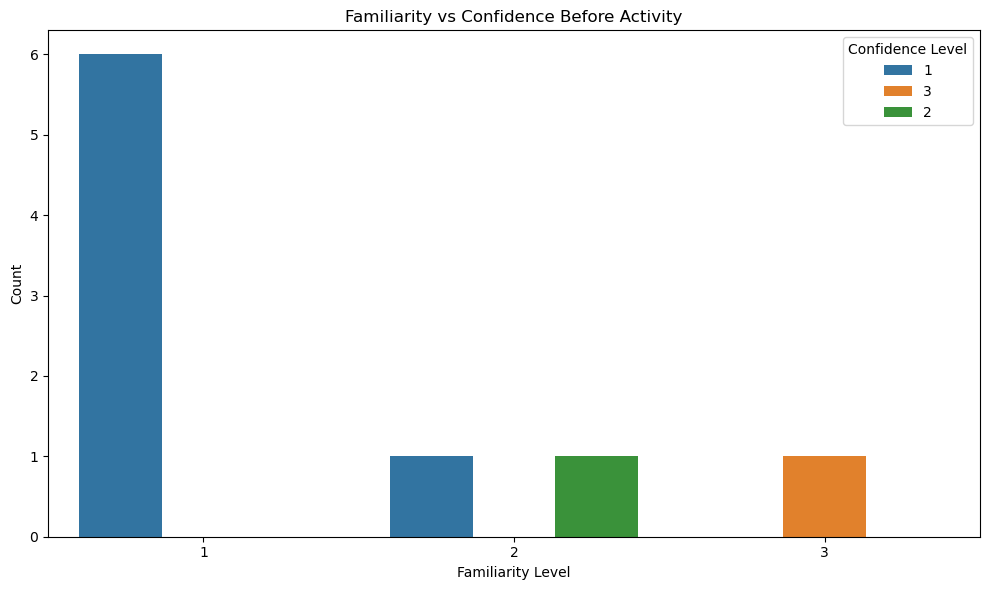

In [8]:
col_familiarity = 'Before this activity, how familiar are you with topics like electoral districts, redistricting or gerrymandering?'
col_confidence = 'How confident are you in your understanding of electoral redistricting and gerrymandering before this activity? '

replies_df[col_confidence] = replies_df[col_confidence].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(data=replies_df, x=col_familiarity, hue=col_confidence)

plt.title('Familiarity vs Confidence Before Activity')
plt.xlabel('Familiarity Level')
plt.ylabel('Count')
plt.legend(title='Confidence Level')

plt.tight_layout()
plt.show()

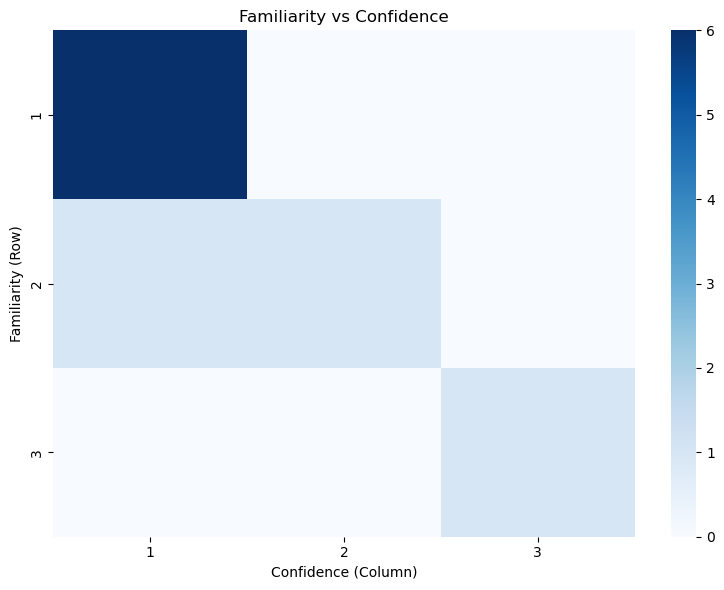

In [9]:
crosstab = pd.crosstab(replies_df[col_familiarity], replies_df[col_confidence])

plt.figure(figsize=(8, 6)) 

# annot=False to leave out the numbers
# fmt='d' ensures they are formatted as integers (no decimals like 5.0)
# cbar=True shows the color legend
sns.heatmap(crosstab, annot=False, cmap='Blues', fmt='d', cbar=True)

plt.title('Familiarity vs Confidence')
plt.ylabel('Familiarity (Row)')
plt.xlabel('Confidence (Column)')

plt.tight_layout()
plt.show()


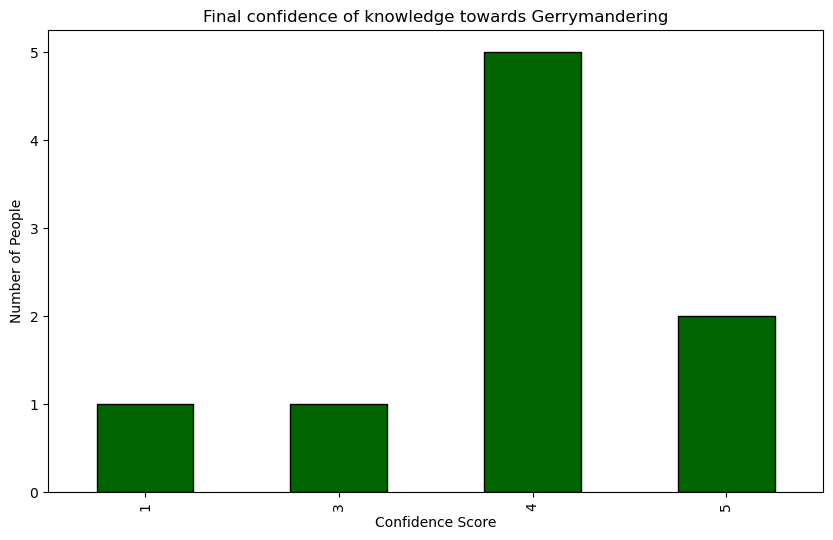

In [11]:
col_final_confidence = replies_df.columns[-2]
plt.figure(figsize=(10,6))

replies_df[col_final_confidence] = replies_df[col_final_confidence].astype(str)

counts = replies_df[col_final_confidence].value_counts().sort_index()

counts.plot(kind='bar', figsize=(10,6), color='darkgreen', edgecolor='black')

plt.title("Final confidence of knowledge towards Gerrymandering")
plt.xlabel("Confidence Score")
plt.ylabel("Number of People")
plt.show()


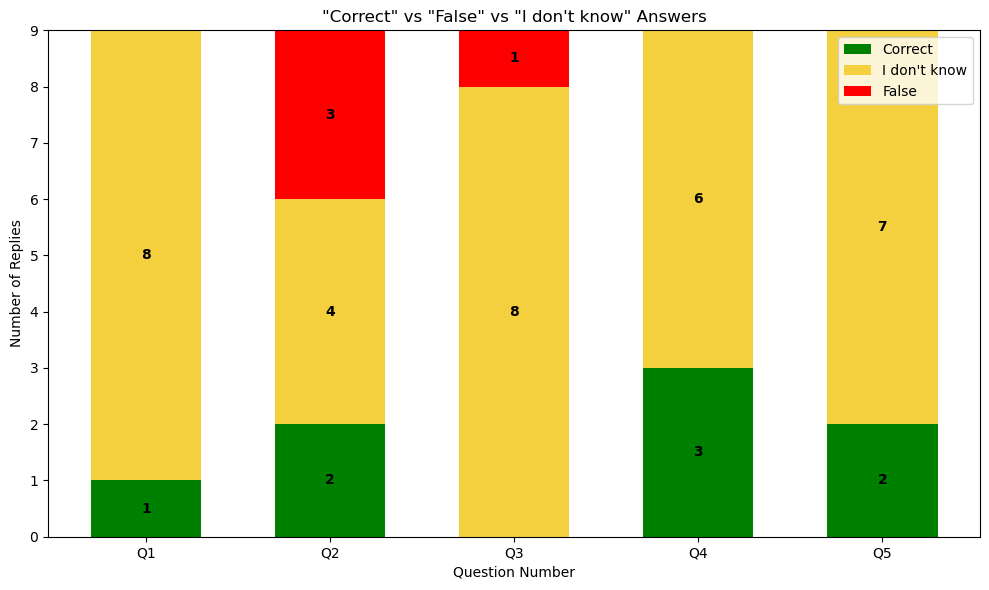

In [12]:
# Answers Before the problem solving and the explanation
questions_map = {
    replies_df.columns[5]: "Drawing district lines to favor a specific political party or group.",
    replies_df.columns[6]: "One party could still win more seats if the district boundaries are drawn in a certain way.",
    replies_df.columns[7]: "Random district creation",
    replies_df.columns[8]: "District boundaries were drawn in a way that favors Party Y.",
    replies_df.columns[9]: "Districts have very irregular shapes, and one party wins many more seats than its share of votes."
}

idk_variations = [
    "I have never heard this term / I don’t know.", 
    "I don't know", 
    "I don’t know."
]
# count the replies
data_for_plot = []
for i, (col_name, correct_ans) in enumerate(questions_map.items()):
    col_data = replies_df[col_name]
    correct_count = (col_data == correct_ans).sum()
    idk_count = col_data.isin(idk_variations).sum()
    false_count = len(replies_df) - correct_count - idk_count
    
    data_for_plot.append({
        "Question": f"Q{i+1}", 
        "Correct": correct_count,
        "I dont know": idk_count,
        "False": false_count
    })

plot_df = pd.DataFrame(data_for_plot)
plt.figure(figsize=(10, 6))

# Bottom Bar: Green (Correct)
p1 = plt.bar(plot_df['Question'], plot_df['Correct'], color='green', label='Correct', width=0.6)

# Middle Bar: Yellow (I don't know)
p2 = plt.bar(plot_df['Question'], plot_df['I dont know'], 
             bottom=plot_df['Correct'], 
             color='#F4D03F', label="I don't know", width=0.6)

# Top Bar: Red (False) 
p3 = plt.bar(plot_df['Question'], plot_df['False'], 
             bottom=plot_df['Correct'] + plot_df['I dont know'], 
             color='red', label='False', width=0.6)

plt.title('"Correct" vs "False" vs "I don\'t know" Answers')
plt.xlabel('Question Number')
plt.ylabel('Number of Replies')
plt.legend()

# Add numbers inside the bars
for p in p1 + p2 + p3:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width/2, p.get_y() + height/2
    if height > 0:
        plt.text(x, y, str(int(height)), ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

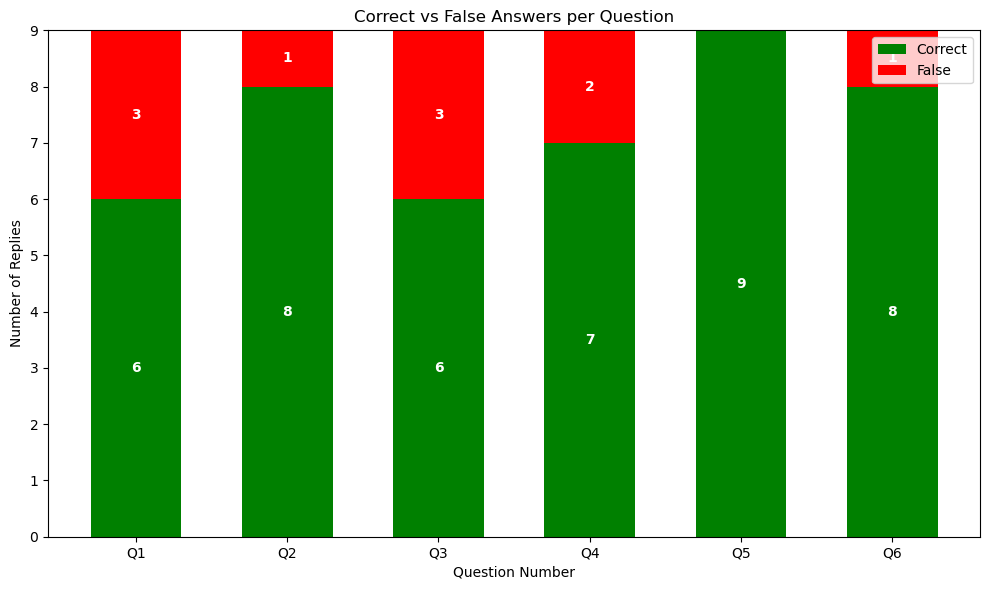

In [13]:
#Answers after the activity and the explanation
questions_map = {
    replies_df.columns[10]: "To maximize the number of districts won by their party",
    replies_df.columns[11]: "The fair player attempts to divide the map without any bias, while the partisan player tries to skew it in their favor.",
    replies_df.columns[12]: "Cracking",
    replies_df.columns[13]: "Deliberately designing district boundaries to benefit a particular party or group.",
    replies_df.columns[14]: "It can lead to disproportionate representation for one party.",
    replies_df.columns[15]: "A map with odd-shaped districts that maximize the influence of one party."
}

# 3. Calculate Counts
data_for_plot = []
for i, (col_name, correct_ans) in enumerate(questions_map.items()):
    correct_count = (replies_df[col_name] == correct_ans).sum()
    false_count = len(replies_df) - correct_count
    
    data_for_plot.append({
        "Question": f"Q{i+1}", 
        "Correct": correct_count,
        "False": false_count
    })

# Convert to DataFrame for easier plotting
plot_df = pd.DataFrame(data_for_plot)

plt.figure(figsize=(10, 6))

# Bottom bar is Green (Correct)
p1 = plt.bar(plot_df['Question'], plot_df['Correct'], color='green', label='Correct', width=0.6)
# Top bar is Red (False), starting where the Green one ends (bottom=...)
p2 = plt.bar(plot_df['Question'], plot_df['False'], bottom=plot_df['Correct'], color='red', label='False', width=0.6)

plt.title('Correct vs False Answers per Question')
plt.xlabel('Question Number')
plt.ylabel('Number of Replies')
plt.legend()

# Optional: Add text labels inside the bars
for p in p1 + p2:
    height = p.get_height()
    if height > 0: # Only label if bar is visible
        plt.text(p.get_x() + p.get_width()/2, 
                 p.get_y() + height/2, 
                 str(int(height)), 
                 ha='center', va='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()